In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [54]:
target = cv2.imread("./test4.jpg")
template = cv2.imread("./sun2.jpg")
#获得模板图片的高宽尺寸
theight, twidth = template.shape[:2]
#执行模板匹配，采用的匹配方式cv2.TM_SQDIFF_NORMED
result = cv2.matchTemplate(target, template, cv2.TM_SQDIFF_NORMED)
#归一化处理
cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1)
#寻找矩阵（一维数组当做向量，用Mat定义）中的最大值和最小值的匹配结果及其位置
_, _, min_loc, max_loc = cv2.minMaxLoc(result)
min_loc, max_loc


((43, 119), (559, 22))

In [55]:
cv2.rectangle(target, min_loc,
              (min_loc[0]+twidth, min_loc[1]+theight), (0, 0, 225), 2)
#显示结果,并将匹配值显示在标题栏上
cv2.imshow("MatchResult----MatchingValue="+strmin_val, target)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
pyautogui.click()

In [24]:
target = cv2.imread("./test3.jpg")
template = cv2.imread("./sun2.jpg")
#获得模板图片的高宽尺寸
theight, twidth = template.shape[:2]
#执行模板匹配，采用的匹配方式cv2.TM_SQDIFF_NORMED
result = cv2.matchTemplate(target, template, cv2.TM_SQDIFF_NORMED)
#归一化处理
cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1)
#寻找矩阵（一维数组当做向量，用Mat定义）中的最大值和最小值的匹配结果及其位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
#匹配值转换为字符串
#对于cv2.TM_SQDIFF及cv2.TM_SQDIFF_NORMED方法min_val越趋近与0匹配度越好，匹配位置取min_loc
#对于其他方法max_val越趋近于1匹配度越好，匹配位置取max_loc
strmin_val = str(min_val)
#绘制矩形边框，将匹配区域标注出来
#min_loc：矩形定点
#(min_loc[0]+twidth,min_loc[1]+theight)：矩形的宽高
#(0,0,225)：矩形的边框颜色；2：矩形边框宽度
cv2.rectangle(target, min_loc,
              (min_loc[0]+twidth, min_loc[1]+theight), (0, 0, 225), 2)
#显示结果,并将匹配值显示在标题栏上
cv2.imshow("MatchResult----MatchingValue="+strmin_val, target)
cv2.waitKey()
cv2.destroyAllWindows()


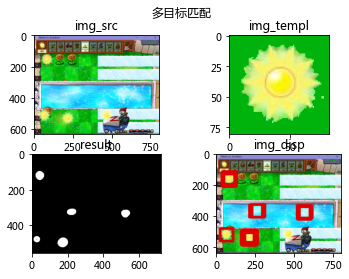

In [64]:
img_src = cv2.imread("./test4.jpg")
img_templ = cv2.imread("./sun2.jpg")
#模板匹配
result_t = cv2.matchTemplate(img_src, img_templ, cv2.TM_CCOEFF_NORMED)
#筛选大于一定匹配值的点
val, result = cv2.threshold(result_t, 0.50, 1.0, cv2.THRESH_BINARY)
match_locs = cv2.findNonZero(result)

img_disp = img_src.copy()
for match_loc_t in match_locs:
    #match_locs是一个3维数组，第2维固定长度为1，取其下标0对应数组
    match_loc = match_loc_t[0]
    #注意计算右下角坐标时x坐标要加模板图像shape[1]表示的宽度，y坐标加高度
    right_bottom = (match_loc[0] + img_templ.shape[1],
                    match_loc[1] + img_templ.shape[0])
    #标注位置
    cv2.rectangle(img_disp, tuple(match_loc), tuple(right_bottom), (0, 0, 225), 5,8)
    cv2.circle(result, tuple(match_loc), 10, (255, 0, 0), 3)

#显示图像
fig, ax = plt.subplots(2, 2)
fig.suptitle('多目标匹配')
ax[0, 0].set_title('img_src')
ax[0, 0].imshow(cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title('img_templ')
ax[0, 1].imshow(cv2.cvtColor(img_templ, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('result')
ax[1, 0].imshow(result, 'gray')
ax[1, 1].set_title('img_disp')
ax[1, 1].imshow(cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))
#ax[0,0].axis('off');ax[0,1].axis('off');ax[1,0].axis('off');ax[1,1].axis('off')
